<a href="https://colab.research.google.com/github/Adheena-Ajayghosh/Assignments/blob/main/Assignment%2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Classification II : Introduction to Decision Trees

```

Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset



In [ ]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

Accuracy of the decision tree on the test set: 

0.974




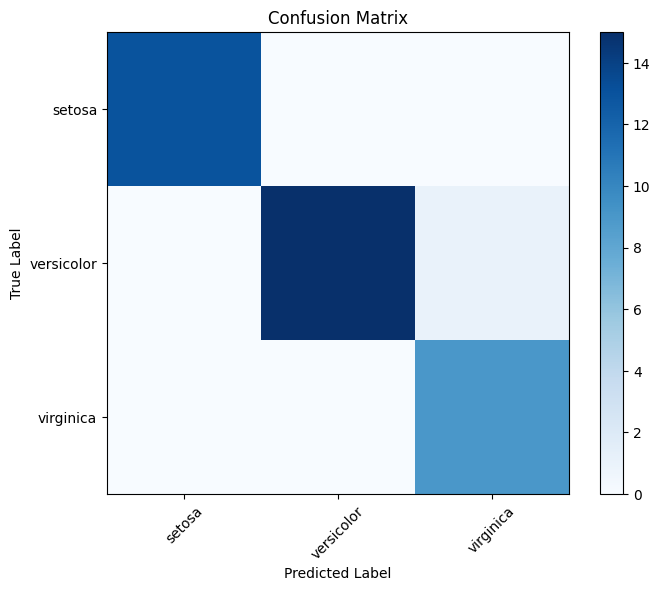

Here is a diagram of the tree created to evaluate each sample:


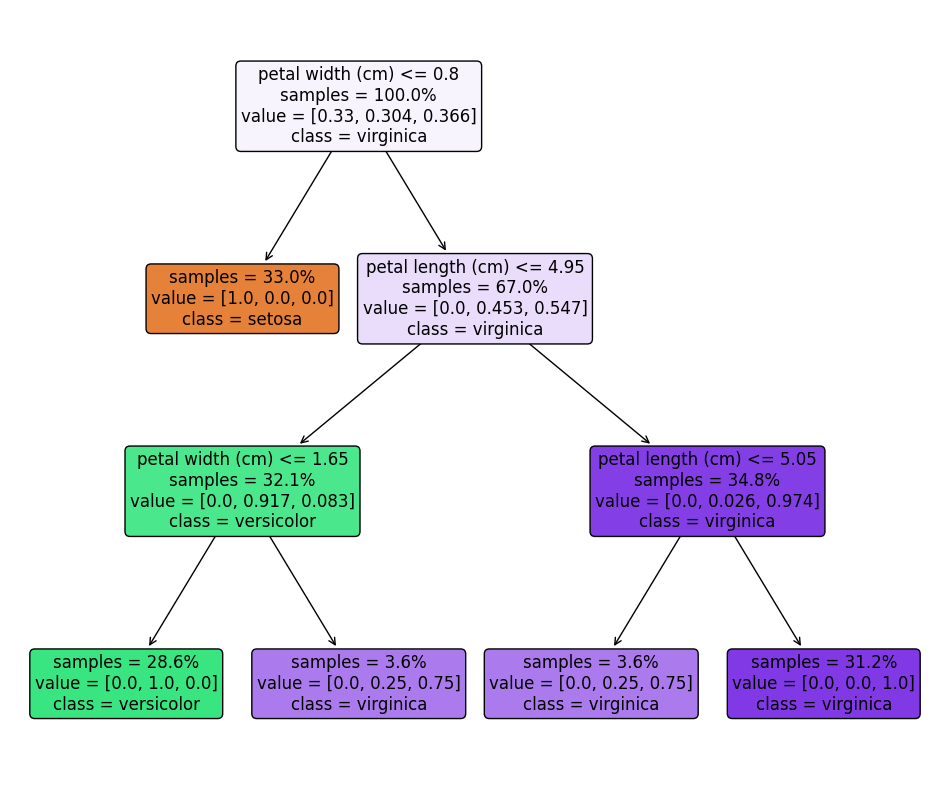

In [ ]:
def performExperiment(trainSet: tuple, testSet: tuple, max_depth: int = None, feature_names: list = None, class_names: list = None, criterion="gini", min_samples_split: int = 2, min_samples_leaf=1):
    # Importing the Decision tree classifier from sklearn:
    clf = tree.DecisionTreeClassifier(max_depth=max_depth,
                                      criterion=criterion,
                                      min_samples_split=min_samples_split,
                                      min_samples_leaf=min_samples_leaf,
                                      splitter="best",
                                      random_state=0,
                                      )
    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy))

    # Calculate and display the confusion matrix using Matplotlib
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("Here is a diagram of the tree created to evaluate each sample:")
    fig, ax = plt.subplots(figsize=(12, 10))
    imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names=feature_names, class_names=class_names, impurity=False, proportion=True, rounded=True, fontsize=12)
    plt.show()

# Define a range of max_depth values to explore
max_depth_range = range(1, 21)  # You can adjust the range as needed
n = 3  # Replace with the desired value for max_depth
performExperiment((X_train, y_train), (X_test, y_test), feature_names=iris["feature_names"], class_names=iris["target_names"], max_depth=n)


## Example of DT on Iris dataset with performace evaluation, and tree structure

In [ ]:
def giveAnExample(example_number):
    if example_number == 2:
        performExperiment((X_train, y_train), (X_test, y_test),
                          feature_names=iris["feature_names"],
                          class_names=iris["target_names"], max_depth=4
                          )

    elif example_number == 3:
        performExperiment((X_train, y_train), (X_test, y_test),
                          feature_names=iris["feature_names"],
                          class_names=iris["target_names"], max_depth=5
                          )

Accuracy of the decision tree on the test set: 

1.000




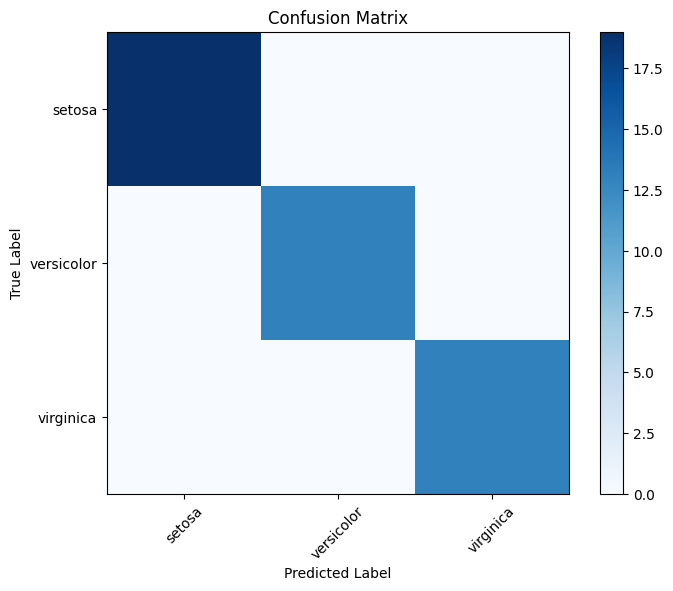

Here is a diagram of the tree created to evaluate each sample:


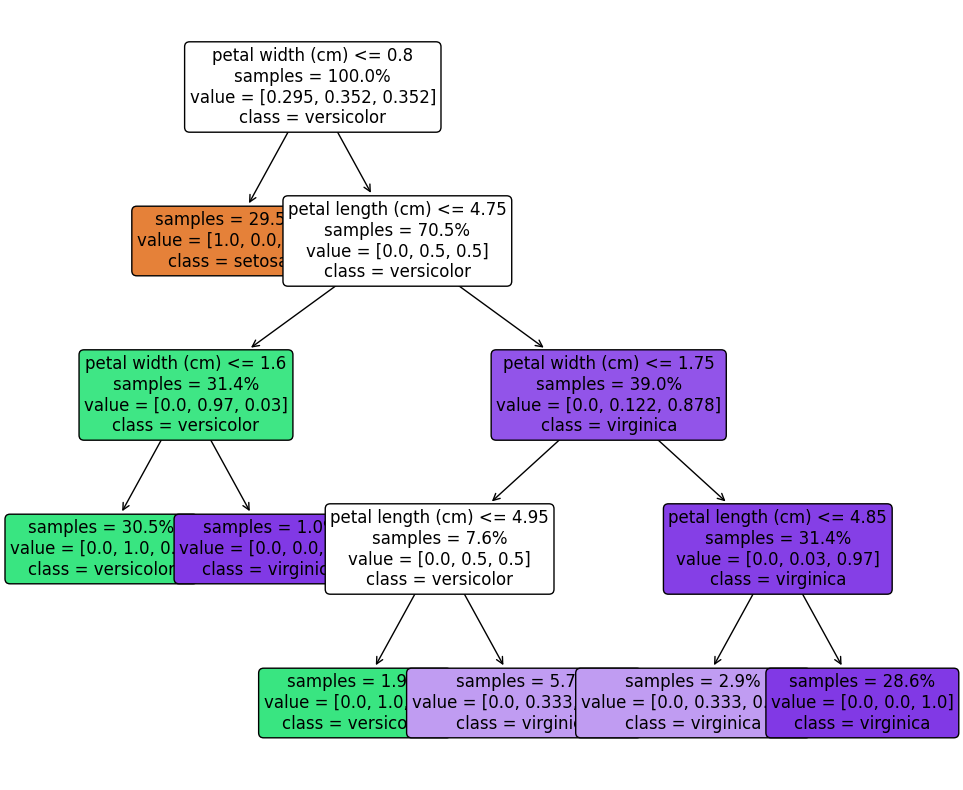

In [ ]:
giveAnExample(2)

Accuracy of the decision tree on the test set: 

1.000




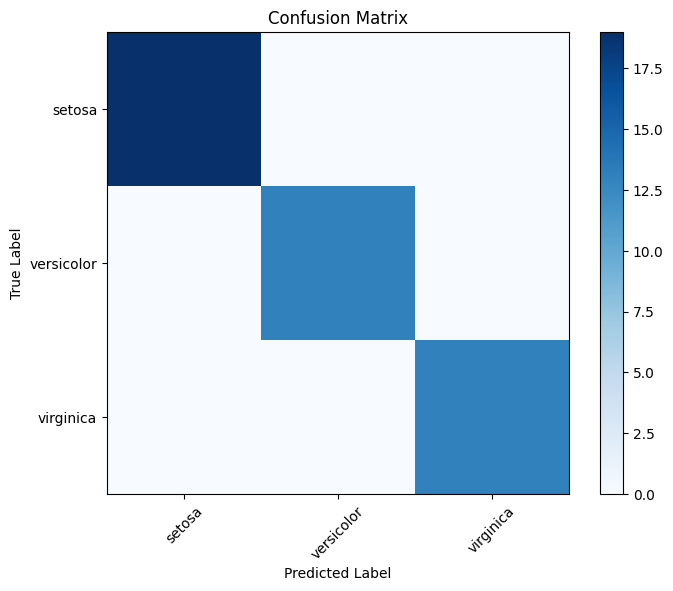

Here is a diagram of the tree created to evaluate each sample:


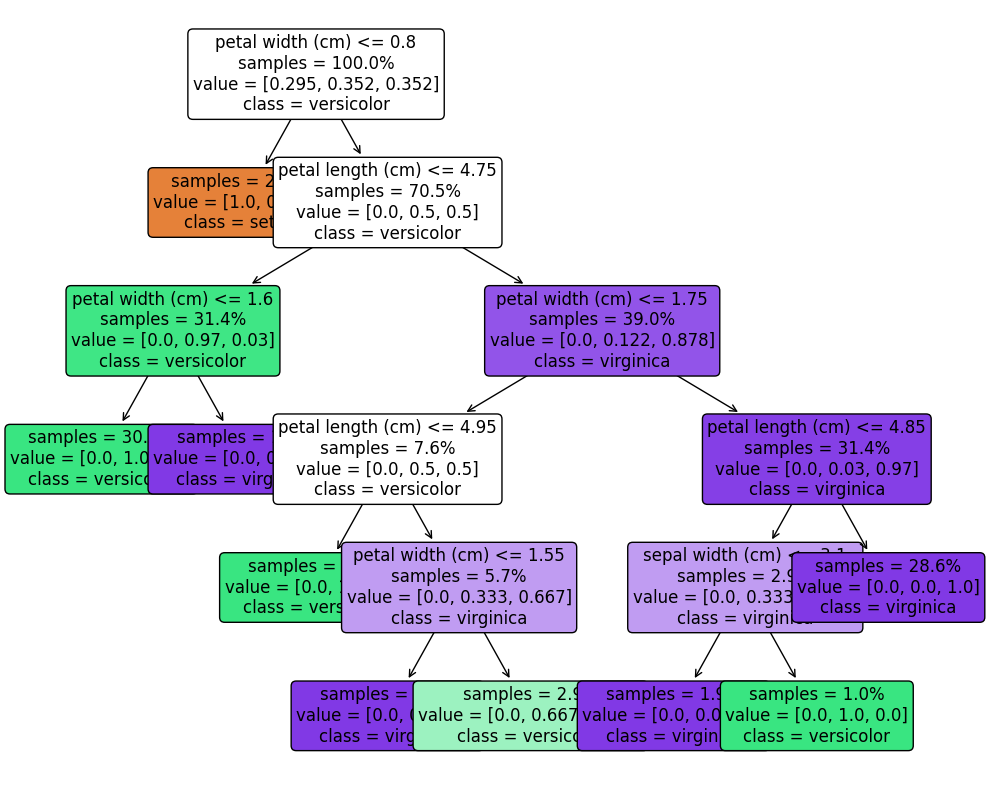

In [ ]:
giveAnExample(3)

### Exercise 1:
 Kindly use the above tree to evaluate the classes for the following examples and verify what percent of them are classified correctly by the tree:

In [ ]:
data_1 = irisData.sample(n = 5, random_state=0)
print(data_1.shape)
data_1.head()

(5, 6)


,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
predicted_classes = clf.predict(data_1.iloc[:, 0:4])
correctly_classified = (predicted_classes == data_1["Class"]).sum()
total_examples = len(y_test)
accuracy_percentage = (correctly_classified / total_examples) * 100

print("Percentage of correctly classified examples:", accuracy_percentage, "\n")

Percentage of correctly classified examples: 0.0 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Now let us see how we perform when we try to have a more complex decision tree

In [ ]:
giveAnExample(3)

### Exercise 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

In [ ]:
def plotDecisionBoundary(X, y, feature_indices, classifier, resolution=0.02):

    # Extract the two features to be plotted
    X_subset = X[:, feature_indices]

    # Generate a grid of feature values
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))

    # Predict the class for each point in the grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and data points
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y, marker='o', edgecolors='black')

    plt.xlabel(f'Feature {feature_indices[0]}')
    plt.ylabel(f'Feature {feature_indices[1]}')
    plt.title('Decision Boundary')
    plt.show()



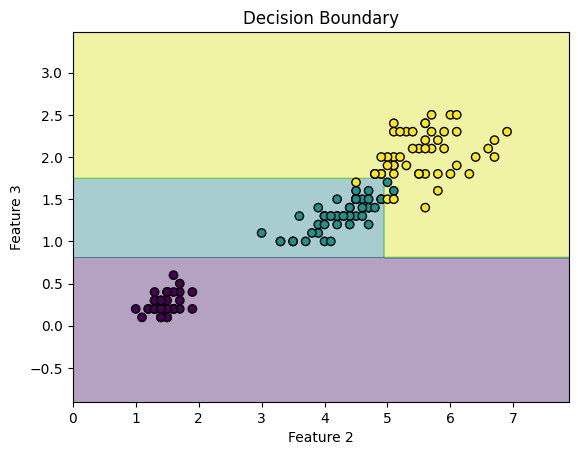

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

**Decision boundary** with considering **sepal width and length**:

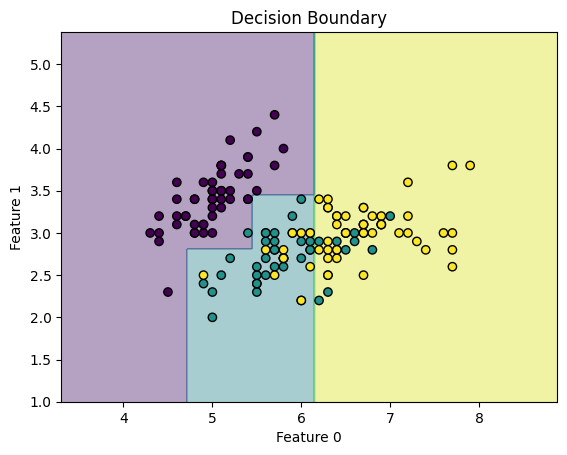

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

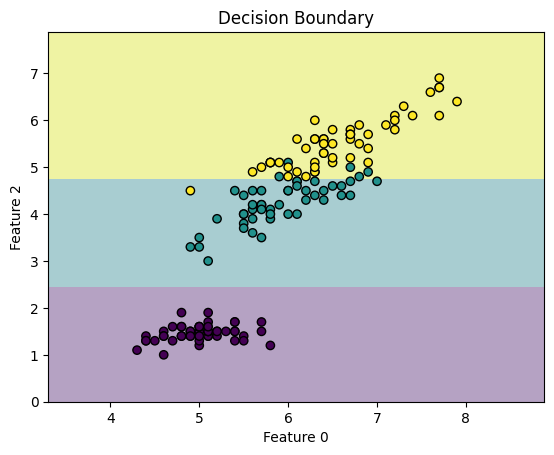

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

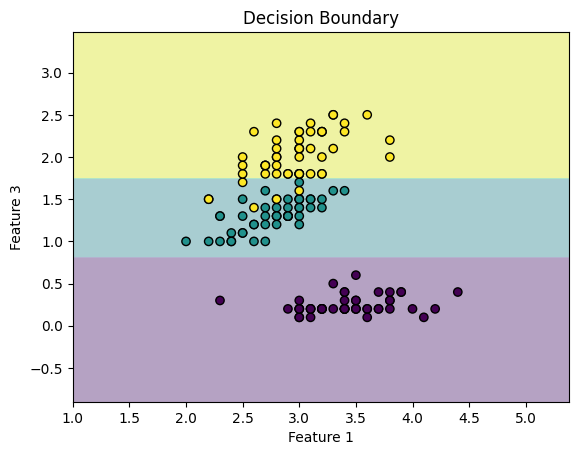

In [ ]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Exercise 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and then pause and ponder.

Test with `max_depth` of the following values:
- 2
- 5
- 10


What do you observe?


---



For max_depth 2 with 0 and 1 

--------------------------------------------------------------------- 



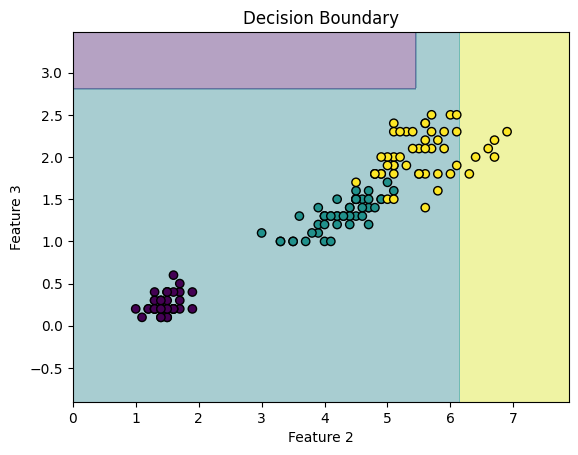

For max_depth 2 with 0 and 2 

--------------------------------------------------------------------- 



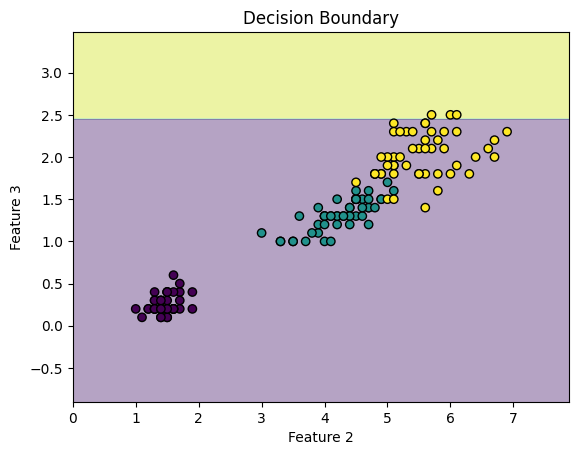

For max_depth 2 with 0 and 3 

--------------------------------------------------------------------- 



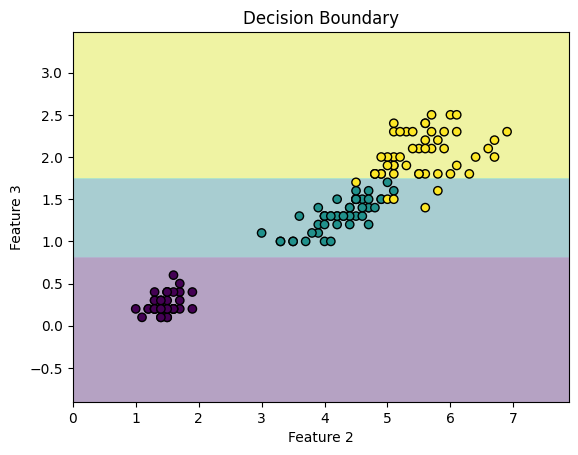

For max_depth 2 with 1 and 2 

--------------------------------------------------------------------- 



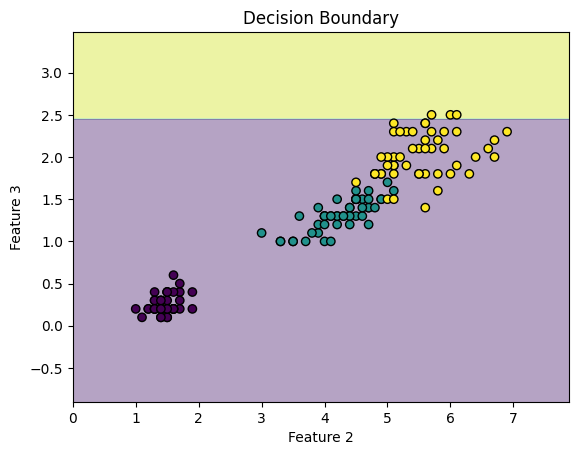

For max_depth 2 with 1 and 3 

--------------------------------------------------------------------- 



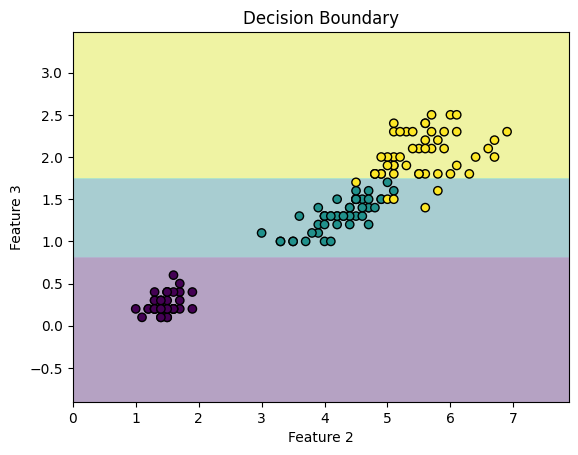

For max_depth 2 with 2 and 3 

--------------------------------------------------------------------- 



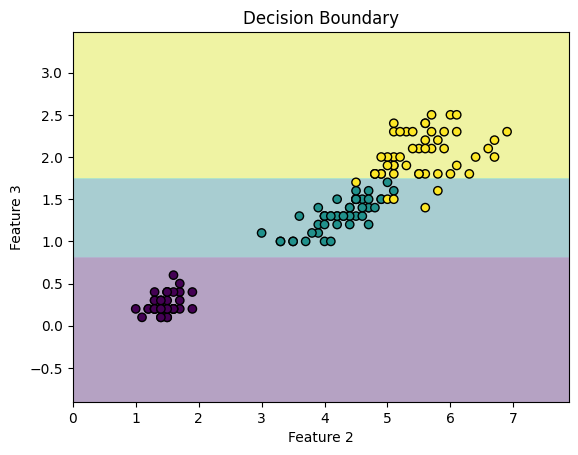

For max_depth 5 with 0 and 1 

--------------------------------------------------------------------- 



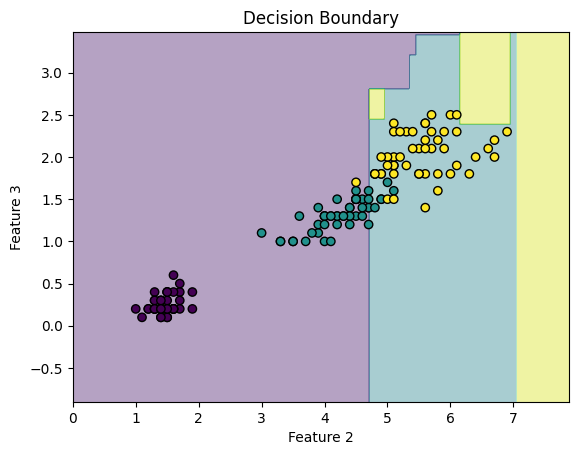

For max_depth 5 with 0 and 2 

--------------------------------------------------------------------- 



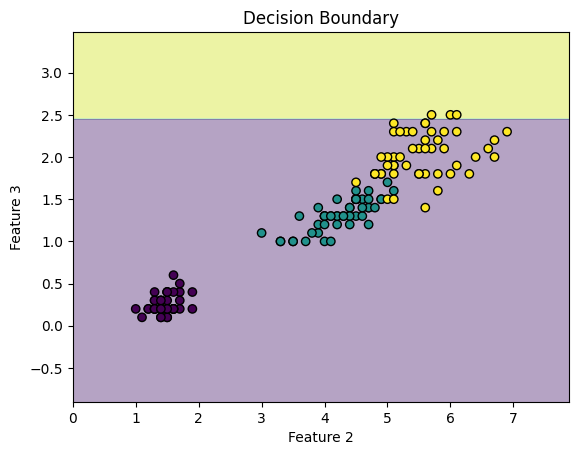

For max_depth 5 with 0 and 3 

--------------------------------------------------------------------- 



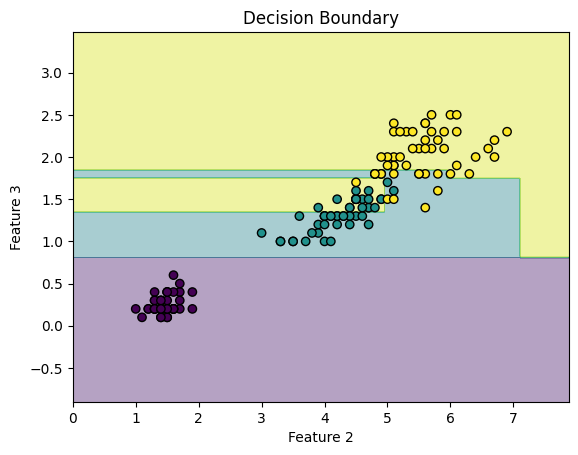

For max_depth 5 with 1 and 2 

--------------------------------------------------------------------- 



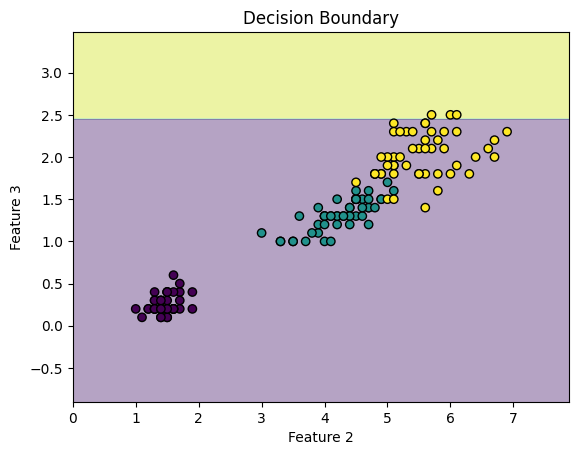

For max_depth 5 with 1 and 3 

--------------------------------------------------------------------- 



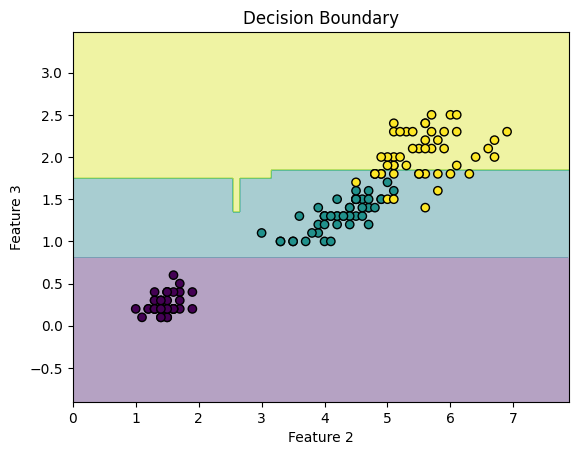

For max_depth 5 with 2 and 3 

--------------------------------------------------------------------- 



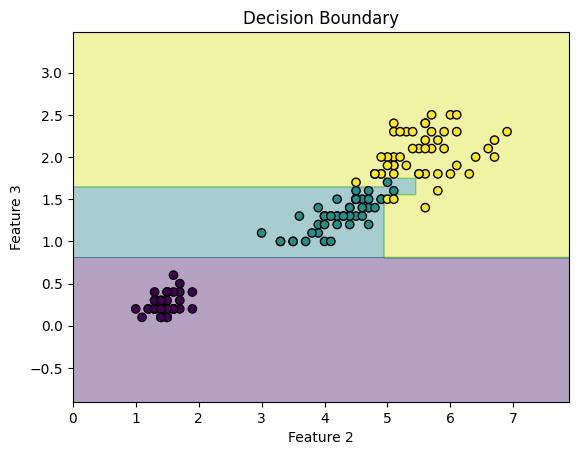

For max_depth 10 with 0 and 1 

--------------------------------------------------------------------- 



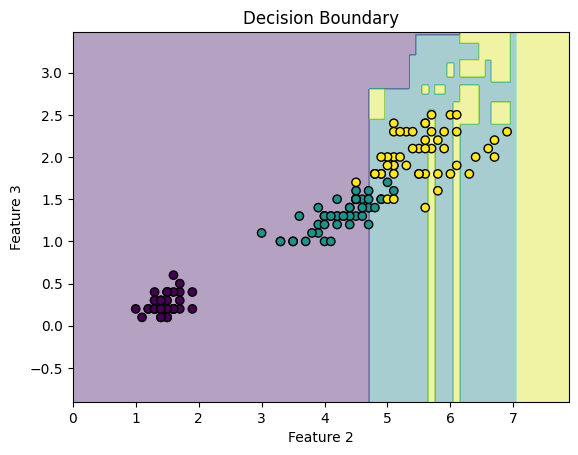

For max_depth 10 with 0 and 2 

--------------------------------------------------------------------- 



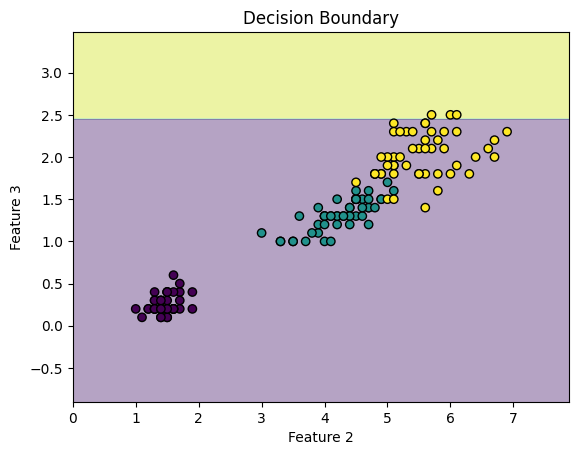

For max_depth 10 with 0 and 3 

--------------------------------------------------------------------- 



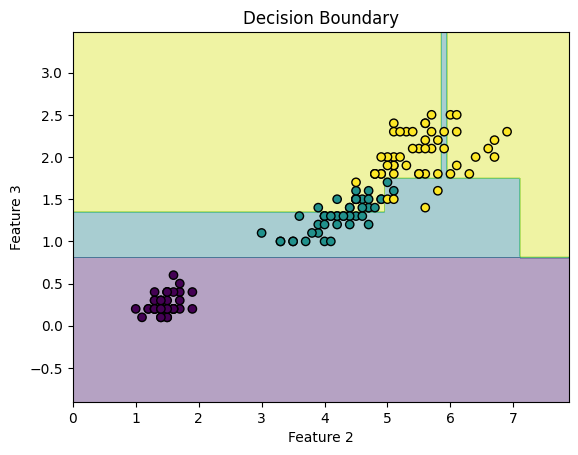

For max_depth 10 with 1 and 2 

--------------------------------------------------------------------- 



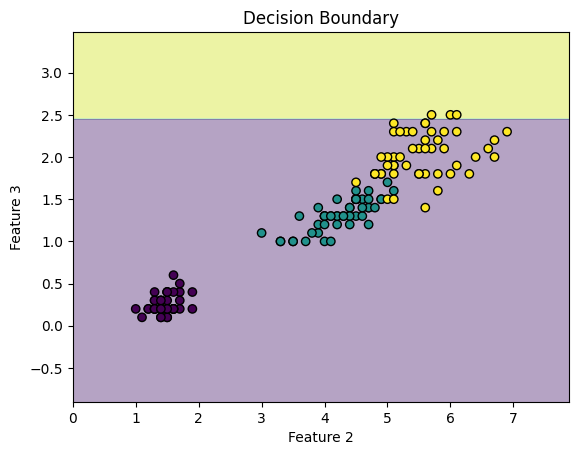

For max_depth 10 with 1 and 3 

--------------------------------------------------------------------- 



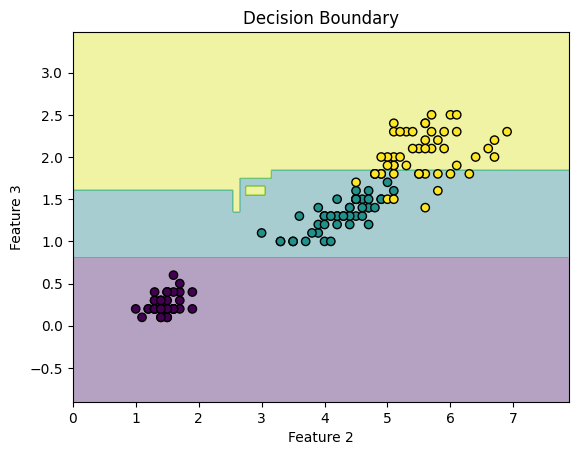

For max_depth 10 with 2 and 3 

--------------------------------------------------------------------- 



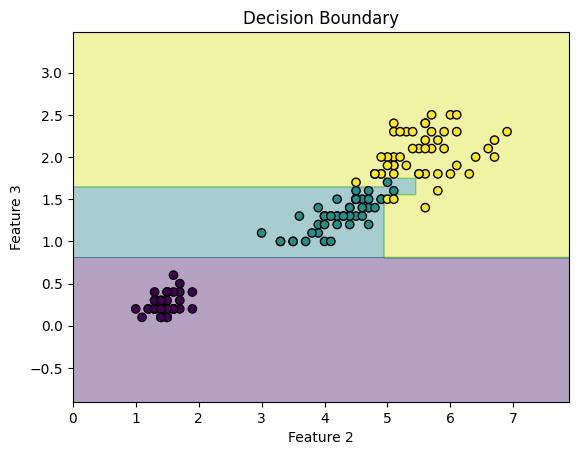

In [ ]:
'''
class labels:

0 	setosa
1 	versicolor
2 	virginica
'''

max_depth_vals = [2, 5, 10]
for md in max_depth_vals:
  for feature1 in range(X.shape[1] - 1):
    for feature2 in range(feature1 + 1, X.shape[1]):


      print("For max_depth {} with {} and {}".format(md, feature1, feature2), "\n")
      print("--------------------------------------------------------------------- \n")
      clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = md)
      pair = [feature1, feature2]
      clf.fit(X[:, pair], y)
      plotDecisionBoundary(X, y, [2, 3], clf)

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`


When selecting a feature to split, the algorithm considers all possible features and thresholds. For simplicity and interpretability, it often chooses to split along one feature at a time.

Given that the algorithm is selecting one feature at a time, the resulting decision boundaries will be aligned with the axes corresponding to those features.

This behavior leads to decision boundaries that are linear and perpendicular to the feature axes.

So, in essence, the decision boundaries in Decision Trees are always perpendicular to the principal axes because the algorithm makes decisions based on individual features one at a time, leading to splits that align with feature axes. This simplicity and orthogonality make Decision Trees easy to understand and interpret but can also result in less complex and potentially less accurate models compared to other algorithms that allow for more flexible boundaries.

### Exercise 4:

Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower. Use the decision tree made in Exercise 2 and realise the logic using multiple nested `if else` statements.

In [ ]:
def predictSpecies(sepal_width, sepal_length, petal_width, petal_length) -> str:
    # Decision Tree logic based on provided conditions
    if petal_width <= 0.75:
        return "setosa"
    elif petal_length <= 4.9:
        return "versicolor"
    else:
        return "virginica"

# Example usage:
sepal_width = 3.5
sepal_length = 5.8
petal_width = 1.2
petal_length = 4.0

predicted_species = predictSpecies(sepal_width, sepal_length, petal_width, petal_length)
print(f"The predicted species is: {predicted_species}")


The predicted species is: versicolor


# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [ ]:
data_2 = irisData.sample(n=10, random_state=5)
print(data_2.shape)
data_2

(10, 6)


,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Exercise 5:
Calculate the Entropy of the above collection of 10 datapoints.


In [ ]:
import numpy as np

def calculate_entropy(class_distribution):
    """
    Calculate the entropy of a collection of data points based on class distribution.

    Parameters:
    - class_distribution: A list or array containing the counts of each class.

    Returns:
    - entropy: The calculated entropy.
    """
    total_count = sum(class_distribution)
    entropy = 0

    for count in class_distribution:
        probability = count / total_count
        if probability > 0:
            entropy -= probability * np.log2(probability)

    return entropy

# Example usage:
# Replace the following with your actual class distribution.
class_distribution = [3, 4, 3]  # Replace with counts of each class.

entropy = calculate_entropy(class_distribution)
print("Entropy:", entropy)


Entropy: 1.5709505944546684


## Exercise 6:
Suggest a decision node (if, else) statement which divides the group into two groups. Also compute the Information Gain in that division step. Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---



In [ ]:
import pandas as pd


In [ ]:
# Import necessary libraries
import pandas as pd  # Add this line to import pandas

# Convert the 'sepal_length' column to a numeric type
data_2['sepal_width'] = pd.to_numeric(data_2['sepal_width'])


In [ ]:
# Calculate the entropy of the original group

total_data_points = len(data_2)
class_counts = data_2['ClassName'].value_counts()
entropy_original = 0
for count in class_counts:
    probability = count / total_data_points
    entropy_original -= probability * np.log2(probability)


# Split the data into two groups based on sepal width
threshold = 3 # selected a random threshold for the spit

group_A = data_2[data_2['sepal_width'] <= threshold]
group_B = data_2[data_2['sepal_width'] > threshold]

# calculating entropy of the subgroups
def calculate_entropy(data):
    class_counts = data['ClassName'].value_counts()
    entropy = 0
    for count in class_counts:
        probability = count / len(data)
        entropy -= probability * np.log2(probability)
    return entropy

entropy_A = calculate_entropy(group_A)
entropy_B = calculate_entropy(group_B)

# calculatin Information Gain
weight_A = len(group_A) / total_data_points
weight_B = len(group_B) / total_data_points
IG = entropy_original - (weight_A * entropy_A + weight_B * entropy_B)

print("Information Gain:", IG)

Information Gain: 0.0058021490143458365
